In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Reconstruct feature matrix
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]  # Target variable (MEDV)

# Feature names from the original dataset
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create a DataFrame for better visualization
df = pd.DataFrame(data, columns=feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
## independant feature and dependant feature
# Now correctly separate features and target
X = df  # Only features (13 columns)
y = target

In [ ]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (404, 13)
Shape of y_train: (404,)


In [ ]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [301]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [ ]:
np.mean(mse)

-24.114955703467764

In [ ]:
##prediction
reg_pred=regression.predict(x_test)

In [ ]:
reg_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

<Axes: ylabel='Density'>

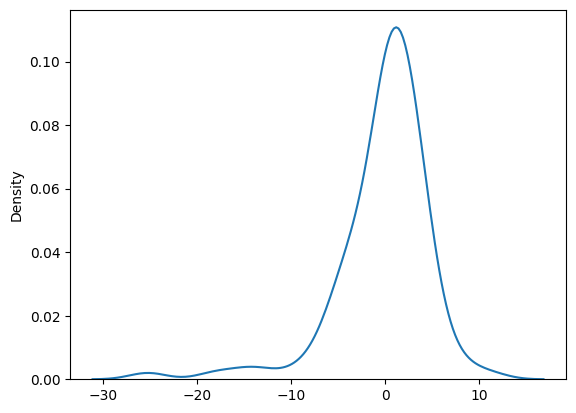

In [ ]:
import seaborn as sns
sns.kdeplot(reg_pred-y_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(reg_pred,y_test)

In [ ]:
score

0.6333247469014345

Ridge regression algorithm

In [293]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [294]:
ridge_regressor=Ridge()

In [296]:
ridge_regressor


Ridge()

In [304]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgeCV=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=10)
ridgeCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [305]:
print(ridgeCV.best_params_)

{'alpha': 10}


In [307]:
ridge_pred=ridgeCV.predict(x_test)

<Axes: ylabel='Density'>

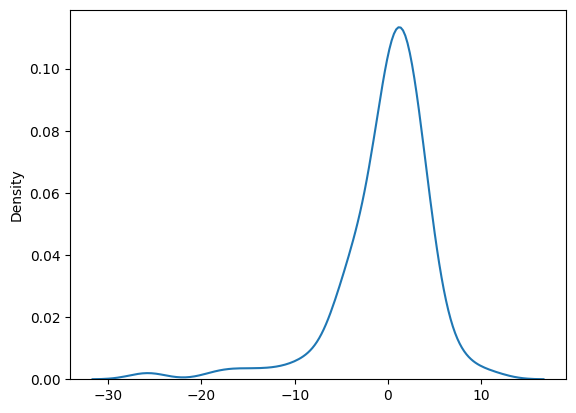

In [308]:
import seaborn as sns
sns.kdeplot(ridge_pred-y_test)

In [310]:
score=r2_score(ridge_pred,y_test)

In [311]:
score

0.6114058534030646

Lasso Regression

In [312]:
from sklearn.linear_model import Lasso


In [313]:
lasso=Lasso()

In [316]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassoCV=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)
lassoCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [317]:
lasso_pred=lassoCV.predict(x_test)

<Axes: ylabel='Density'>

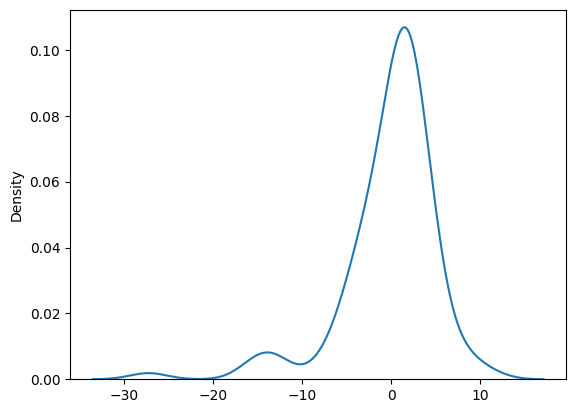

In [318]:
import seaborn as sns
sns.kdeplot(lasso_pred-y_test)

In [319]:
score=r2_score(lasso_pred,y_test)

In [320]:
score

0.3186642087016749